In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_excel('/content/cars24.xlsx')
df.head()

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price,Location,Owners
0,2012 Maruti Ritz,55.48k km,2012,Petrol,Manual,â‚¹2.04 lakh,"Kandivali, Mumbai",1st owner
1,2018 Maruti Ciaz,62.83k km,2018,Petrol,Manual,â‚¹5.81 lakh,"Mulund West, Mumbai",1st owner
2,2016 Maruti Wagon R 1.0,17.64k km,2016,Petrol,Manual,â‚¹3.41 lakh,"Mulund West, Mumbai",1st owner
3,2013 Maruti Swift Dzire,1.0L km,2013,Petrol,Manual,â‚¹3.36 lakh,"Mulund West, Mumbai",1st owner
4,2015 Maruti Ertiga,55.49k km,2015,Petrol,Manual,â‚¹5.98 lakh,"Kandivali, Mumbai",1st owner


In [ ]:
df.tail()

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price,Location,Owners
70,2016 Maruti Ciaz,55.49k km,2016,Petrol,Auto,â‚¹5.12 lakh,"Regency Anantam, Dombivli East",1st owner
71,2021 Maruti Ciaz,26.49k km,2021,Petrol,Manual,â‚¹7.01 lakh,"Korum Mall, Thane West",1st owner
72,2016 Maruti Celerio,60.90k km,2016,CNG,Manual,â‚¹3.60 lakh,"Regency Anantam, Dombivli East",1st owner
73,2017 Maruti Ciaz,95.33k km,2017,Petrol,Manual,â‚¹4.58 lakh,"Regency Anantam, Dombivli East",2nd owner
74,2020 Maruti S PRESSO,27.71k km,2020,Petrol,Auto,â‚¹3.99 lakh,"Mulund West, Mumbai",1st owner


In [ ]:
df.shape

(75, 8)

In [ ]:
df.dtypes

,0
Name,object
Kilometers Driven,object
Year of Manufacture,int64
Fuel Type,object
Transmission Type,object
Price,object
Location,object
Owners,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 75 non-null     object
 1   Kilometers Driven    75 non-null     object
 2   Year of Manufacture  75 non-null     int64 
 3   Fuel Type            75 non-null     object
 4   Transmission Type    75 non-null     object
 5   Price                75 non-null     object
 6   Location             75 non-null     object
 7   Owners               75 non-null     object
dtypes: int64(1), object(7)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,Year of Manufacture
count,75.000000
mean,2018.200000
std,2.681266
min,2012.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2023.000000


In [ ]:
df['Kilometers Driven'] = df['Kilometers Driven'].str.replace('k km', '00').str.replace('L km', '00000').str.replace('.', '', regex=False).astype(float).astype(int)

df['Price'] = df['Price'].str.replace('â‚¹', '').str.replace(' lakh', '00000', regex=False).str.replace('.', '', regex=False).astype(float)

In [ ]:
df.dtypes

,0
Name,object
Kilometers Driven,int64
Year of Manufacture,int64
Fuel Type,object
Transmission Type,object
Price,float64
Location,object
Owners,object


In [ ]:
le = LabelEncoder()
categorical_cols = ['Fuel Type', 'Transmission Type', 'Owners']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.dtypes

,0
Name,object
Kilometers Driven,int64
Year of Manufacture,int64
Fuel Type,int64
Transmission Type,int64
Price,float64
Location,object
Owners,int64


In [ ]:
df.head()

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price,Location,Owners
0,2012 Maruti Ritz,554800,2012,2,1,20400000.0,"Kandivali, Mumbai",0
1,2018 Maruti Ciaz,628300,2018,2,1,58100000.0,"Mulund West, Mumbai",0
2,2016 Maruti Wagon R 1.0,176400,2016,2,1,34100000.0,"Mulund West, Mumbai",0
3,2013 Maruti Swift Dzire,1000000,2013,2,1,33600000.0,"Mulund West, Mumbai",0
4,2015 Maruti Ertiga,554900,2015,2,1,59800000.0,"Kandivali, Mumbai",0


In [ ]:
df.tail()

,Name,Kilometers Driven,Year of Manufacture,Fuel Type,Transmission Type,Price,Location,Owners
70,2016 Maruti Ciaz,554900,2016,2,0,51200000.0,"Regency Anantam, Dombivli East",0
71,2021 Maruti Ciaz,264900,2021,2,1,70100000.0,"Korum Mall, Thane West",0
72,2016 Maruti Celerio,609000,2016,0,1,36000000.0,"Regency Anantam, Dombivli East",0
73,2017 Maruti Ciaz,953300,2017,2,1,45800000.0,"Regency Anantam, Dombivli East",1
74,2020 Maruti S PRESSO,277100,2020,2,0,39900000.0,"Mulund West, Mumbai",0


In [ ]:
df.isnull().sum()

,0
Name,0
Kilometers Driven,0
Year of Manufacture,0
Fuel Type,0
Transmission Type,0
Price,0
Location,0
Owners,0


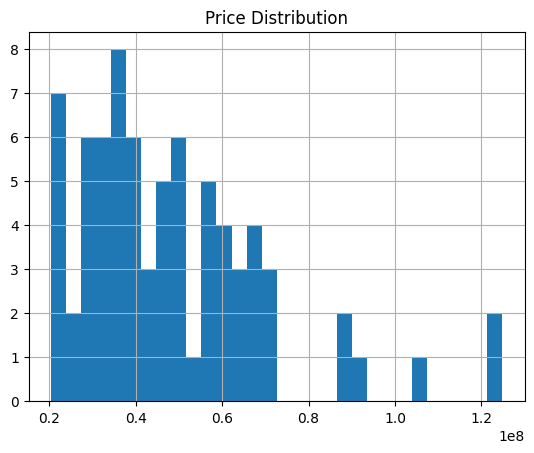

In [ ]:
df['Price'].hist(bins=30)
plt.title('Price Distribution')
plt.show()


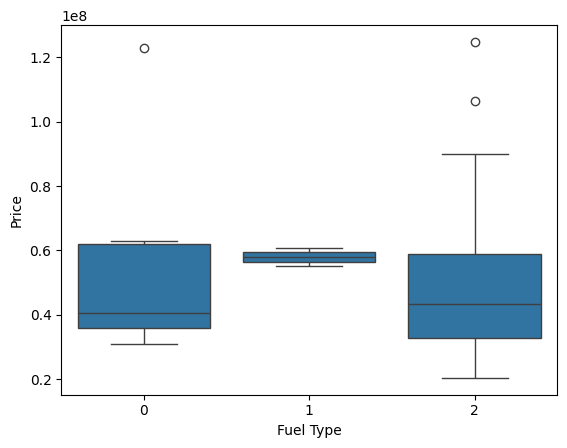

In [ ]:
sns.boxplot(data=df, x='Fuel Type', y='Price')
plt.show()

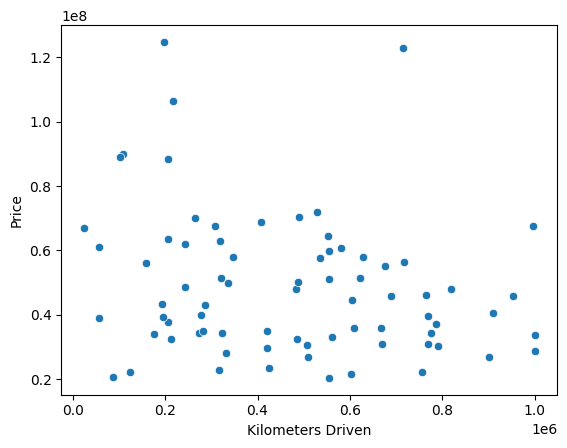

In [ ]:
sns.scatterplot(data=df, x='Kilometers Driven', y='Price')
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [ ]:
df = remove_outliers_iqr(df, 'Price')

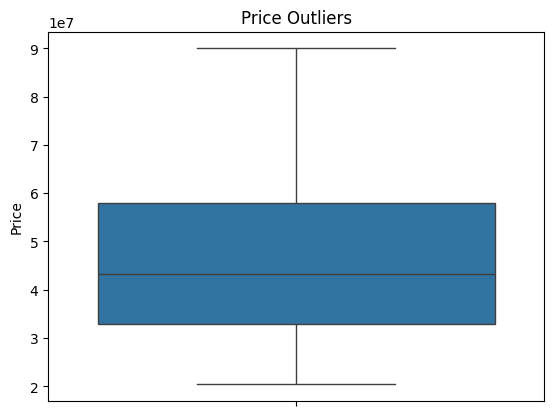

In [ ]:
sns.boxplot(df['Price']) #outliers removed
plt.title("Price Outliers")
plt.show()

In [ ]:
df.dtypes

,0
Name,object
Kilometers Driven,int64
Year of Manufacture,int64
Fuel Type,int64
Transmission Type,int64
Price,float64
Location,object
Owners,int64


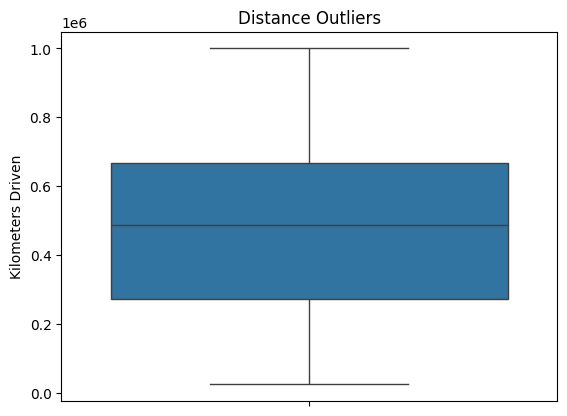

In [ ]:
#to check other numerical column
sns.boxplot(df['Kilometers Driven'])
plt.title("Distance Outliers")
plt.show()

In [ ]:
selected_columns = ['Price', 'Kilometers Driven', 'Transmission Type', 'Fuel Type']
df_selected = df[selected_columns]
corr = df_selected.corr()

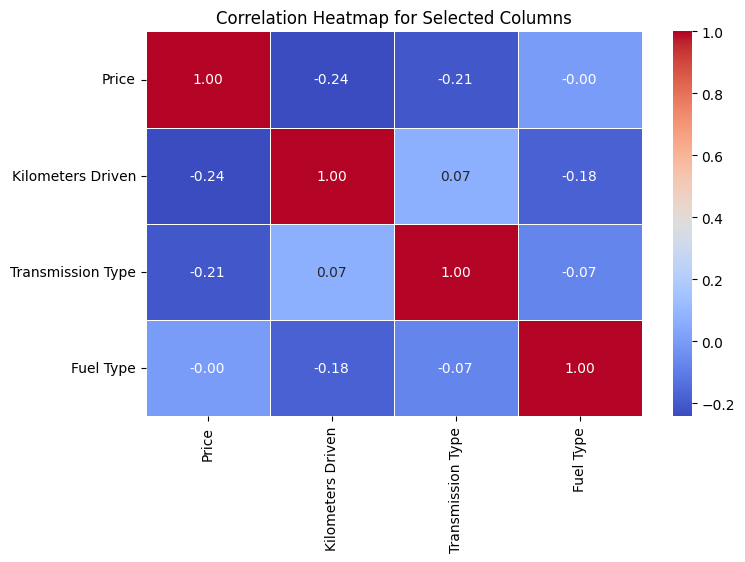

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

In [ ]:
df.to_csv("cleaned_used_cars.csv", index=False)
